In [2]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from ipywidgets import IntSlider, FloatSlider, interact, Output, HBox, interactive_output, Checkbox, VBox

from scipy import random
from scipy.stats import beta
from IPython.display import display, clear_output
from ipywidgets import Button

### Plots

In [6]:

# use plt.Axes(figure, [left, bottom, width, height])
# where each value in the frame is between 0 and 1

# left
def show_cond_plot():
    outp = Output(layout={'border':'2px solid ', 'width':'200px'})
    p_a = 0.4
    p_b = 0.25
    p_ab = 0.1
    def cond_plot3(p_a, p_b, p_ab):
        x = np.linspace(0, 1, 101)
        figure = plt.figure(figsize=(10,3))

        outp.clear_output(wait=True)
        with outp:
            print("Probabilities")
            print("\n\n\n\nP(A) =  {}".format(p_a))
            print("P(B) =  {}".format(p_b))
            print("P(AB) = {}".format(p_ab))
            print("\n\n\n\nP(B|A) = P(AB)/P(A)".format(round(p_ab/ p_a, 5)))
            print("       = {}".format(round(p_ab/ p_a, 5)))
            print("\n\n\n\n\n\nP(A|B) = P(AB)/P(B)")
            print("       = {}".format(round(p_ab / p_b, 5)))

        #Overall
        ax1 = plt.Axes(figure, [0, 1.2, 1, .5])
        figure.add_axes(ax1)
        ax1.set_title("Overall Probabilities", fontsize = 14)

        plt.fill_between(x, 1, where=x<=p_a, alpha = 0.5, color='red')
        plt.fill_between(x+p_a-p_ab, 1, where=x<=p_b, alpha = 0.5, color='blue')
        plt.legend(['P(A)','P(B)'], fontsize = 24, loc="upper left", bbox_to_anchor=(1,1))
        plt.xlim(0,1)
        plt.ylim(0,1)
        frame = plt.gca()
        frame.get_xaxis().set_visible(False)
        frame.get_yaxis().set_visible(False)

        # Conditioned on p_a
        ax2 = plt.Axes(figure, [0, .6, p_a, .5])
        figure.add_axes(ax2)
        ax2.set_title("After Conditioning on A", fontsize = 14)

        plt.fill_between(x, 1, where=x<=p_a, alpha = 0, color='red')
        plt.fill_between(x+p_a-p_ab, 1, where=x<=p_b, alpha = 0.5, color='blue')
        plt.xlim(0,p_a)
        plt.ylim(0,1)
        frame = plt.gca()
        frame.get_xaxis().set_visible(False)
        frame.get_yaxis().set_visible(False)


        # Conditioned on p_b
        ax3= plt.Axes(figure, [p_a-p_ab, 0, p_b, 0.5])
        figure.add_axes(ax3)
        ax3.set_title("After Conditioning on B", fontsize = 14)
        plt.fill_between(x, 1, where=x<=p_a, alpha = 0.5, color = 'red')

        plt.fill_between(x+p_a-p_ab, 1, where=x<=p_b, alpha = 0, color='blue')

        plt.xlim(p_a-p_ab,p_a+p_b-p_ab)
        plt.ylim(0,1)
        frame = plt.gca()
        frame.get_xaxis().set_visible(False)
        frame.get_yaxis().set_visible(False)

        plt.show()

    pa = FloatSlider(value = 0.4, 
                     min = 0.2, 
                     max = 0.5, 
                     step=0.01,
                     description = 'P(A)',
                     layout={'width': '300px'},
                     continuous_update = False)
    pb = FloatSlider(value = 0.25, 
                     min = 0.2, 
                     max = 0.5, 
                     step=0.01, 
                     description = 'P(B)',
                     layout={'width': '300px'},
                     continuous_update = False)
    pab = FloatSlider(value = 0.2, 
                      min =0, 
                      max = 0.2, 
                      step =0.01, 
                      description = 'P(AB)',
                      layout={'width': '300px'},
                      continuous_update=False)

    ui_cond = HBox([pa, pb, pab])
    cond_plot_interactive = interactive_output(cond_plot3, {'p_a': pa, 'p_b':pb, 'p_ab':pab})
    graph_and_controls = VBox([ui_cond, cond_plot_interactive])

    display(HBox([outp, graph_and_controls]))



beta_out = Output(layout={'border':'1px solid green'})
def beta_dist_plot(a, b):

    with beta_out:
        clear_output(wait=True)
        print("Mean: {}".format(round((a/(a+b)),2)))
        var = round( (a*b)/((a+b)**2*(a+b+1)),5)
        print("Variance: {}".format(var))
        print("St. Dev: {}".format(round(var**.5, 4)))
    x_beta = np.linspace(0, 1, 501)
    y = beta.pdf(x_beta, a, b)
    fig = plt.figure()
    plt.xlim(0,1)
    plt.ylim(0, y.max()+.3)
    frame = plt.gca()
    frame.axes.get_yaxis().set_visible(False)
    plt.plot(x_beta,y)
    plt.show()
    
a_slide = IntSlider(value = 2, 
                 min = 1, 
                 max = 100, 
                 step=1, 
                 description = 'alpha',
                 layout={'width': '300px'},
                 continuous_update = True)
b_slide = IntSlider(value = 2, 
                  min =1, 
                  max = 100, 
                  step =1, 
                  description = 'beta',
                  layout={'width': '300px'},
                  continuous_update=True)
ui_beta = HBox([a_slide, b_slide])
beta_plot_interactive = interactive_output(beta_dist_plot, {'a':a_slide, 'b':b_slide})
beta_graph_and_controls = VBox([ui_beta, beta_plot_interactive])


button3 = Button(description="Generate sample, p=0.3", layout={'width':'300px'})
button5 = Button(description="Generate sample, p=0.5", layout={'width':'300px'})
button8 = Button(description="Generate sample, p=0.8", layout={'width':'300px'})

binom_output = Output(layout={'border':'1px solid white'})
with binom_output:
    binom_sample_20(0)
def on_button_clicked3(a):
    with binom_output:
        clear_output(wait=True)
        binom_sample_20(0.3)
        
def on_button_clicked5(a):
    with binom_output:
        clear_output(wait=True)
        binom_sample_20(0.5)
        
def on_button_clicked8(a):
    with binom_output:
        clear_output(wait=True)
        binom_sample_20(0.8)
    
button3.on_click(on_button_clicked3)
button5.on_click(on_button_clicked5)
button8.on_click(on_button_clicked8)

def binom_sample_20(p):
    fig = plt.figure(figsize=(5,5))
    plt.xlim(0.5, 4.5)
    plt.ylim(0.5, 5.5)
    count=0
    sample = random.binomial(size=20, n=1, p=p)
    for i in range(4):
        for j in range(5):
            if sample[count]:
                plt.plot(i+1,j+1,'ko', markersize = 20)
            else:
                plt.plot(i+1, j+1, 'wo-', markersize = 20, linewidth = 10, markeredgecolor= 'black')
            count+=1
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()


p_slide = FloatSlider(value = 0.5, 
    min =0, 
    max = 1, 
    step =0.01, 
    description = 'p',
    layout={'width': '300px'},
    continuous_update=False)
binom_sample_interactive = interactive_output(binom_sample_20, {'p':p_slide})

# Bayesian Posterior Inference

In the last lecture, we performed a hypothesis test to try to identify a significant effect on sales in a coffee shop based on running a happy-hour promotion. Let's summarize those results again:
1. Over a one week period of each treatment, the happy-hour trial saw an average increase in daily sales of \$80.92
2. We formulated a two-sided paired t-test with an error value of $\alpha = 0.05$. 
3. The test produced a p-value of $0.09$, so we failed to reject the null hypothesis. 

At this point, we concluded that we didn't have significant evidence against the null hypothesis to adopt the claim that there is a significant effect on sales based on running the promotion. This may raise any number of questions:

1. What motivated the choice of $\alpha = 0.05$? After all, if we set $\alpha = 0.1$, we would have rejected the null hypothesis. 
2. What if the experiment gave us an average daily sales difference of only \$10, but a p-value of 0.049? Does the result with more statistical significance also carry more real-world significance?
3. Let's say that the over the last 3 months, raising prices by 25 cents at another store location increased sales by an average of $130.24. Was our investigation at the new store informed by our prior beliefs? Moreover, do the results of the experiment affect those beliefs?

These questions motivate another line of statistical analysis: **Bayesian Inference**.

At its core, Bayesian Inference gives us a host of methods for applying and updating previous beliefs when performing statistical analysis. In other words, it is a method for answering the question:



### How do we adjust our beliefs based on new observations *given our previous beliefs? *

Bayesian statistics answers this question with a mathematical formula known as Bayes' Rule or Bayes' Theorem. In this notation, $X$ represents our observed data, and $\theta$ parametrizes a model giving the data's underlying distribution. We don't know $\theta$, but based on prior beliefs or results, we think $\theta$ falls along its own distribution, parametrized by $\alpha$. 


Shown below is the *model form* of Bayes' Rule.  

$$ \text{P}(\theta \: | \: X, \alpha) = \frac {\text{P} (X|\theta, \alpha)  \text{P}(\theta|\alpha)}{\text{P}(X|\alpha)}$$

The terms in this formula have specific names and interpretations:
- $\text{P}(\theta | \alpha)$: The **prior** distribution. This is a distribution of $\theta$ values with hyperparameter $\alpha$. By describing our prior beliefs about $\theta$ as a distribution, we encode not only our best point estimate for $\theta$, but also the uncertainty inherent in our estimate.
- $\text{P}(X|\theta)$: The **marginal likelihood**. This is the likelihood of $X$ after considering all possible values of $\theta$.
- $\text{P} (\theta \: | \: X)$: The **posterior** distribution. This is a new distribution for $\theta$ after considering our observed data.


Before getting into a detailed analysis and application of this formula, let's revisit the idea of **conditional probability**, which is denoted by the presence of the symbol "|" that appears in the probability statements above.

## Conditional Probability

Suppose 40% of customers of a popular coffee shop order iced drinks, and 30% order pastries. Suppose that 15% of people order both iced drinks and pastries.

We're interested in the following questions:

- What is the probability that a customer ordered an iced drink given that they ordered a pastry?
- What is the probability that a customer ordered a pastry given that they ordered an iced drink?

The answers to these questions rely on **conditional probability**, the probability of an event occurring *given* knowledge that another event has already occurred. 


### Notation
- Let A denote the event that a customer orders an iced drink.
- Let B denote the event that a customer orders a pastry.
- Let AB denote the event that someone orders both an iced drink and a pastry. 
    - This is often written as $A \cap B$, where the symbol $\cap$ means the **intersection** of A and B.

For any of these events, let P(event) denote the probability the event occurs. From above, we see that $P(A)=0.30$, meaning there is a 40% chance that a customer orders an iced drink.

From these definitions we can define and formulate the probability that A has occurred given that B has already occurred, and vice versa.

- Let P(A|B) denote the probability that A will occur if B has already occurred.

Intuitively, we can think of computing the probability $P(A|B)$ in the following steps:
1. P(B) tells us that 40 out of 100 customers will order a pastry.
2. P(AB) tells us that 15 out of 100 customers will order a pastry and an iced drink.
3. This means that 15 out of the 40 customers who ordered a pastry also ordered an iced drink. 
 - As a result, there is a $15/40 = 0.375$ probability that a customer will order and iced drink if they also order a pastry.


### Computing Conditional Probabilities
Formally, the conditional probability is computed as follows:

$$ \begin{align} P(A|B) = \frac{P(AB)}{P(B)} &\:  &\:  &  P(B|A) = \frac{P(AB)}{P(A)} \end{align}$$



Shown below is a visualization of conditional probability. In the top plot, individual probabilities of event A and B are shown, as well as the probability that both A and B occur. The purple region represents the probability of the event AB occuring, while the red and blue regions correspond to A and B, respectively.

In the second and third plots, we see the resulting conditional probabilities after conditioning on either A or B. 

In plot 2, for example, we have reduced the event space to only consider cases for which event A has occurred. As a result, the only remaining cases where B occurs are those for which both A and B occur. The probability og B given A, then, can be seen as the proportion of the width of the colored region to the width of the entire plot.

In [4]:
show_cond_plot()

HBox(children=(Output(layout=Layout(border='2px solid ', width='200px')), VBox(children=(HBox(children=(FloatSlider(value=0.4, continuous_update=False, description='P(A)', layout=Layout(width='300px'), max=0.5, min=0.2, step=0.01), FloatSlider(value=0.25, continuous_update=False, description='P(B)', layout=Layout(width='300px'), max=0.5, min=0.2, step=0.01), FloatSlider(value=0.2, continuous_update=False, description='P(AB)', layout=Layout(width='300px'), max=0.2, step=0.01))), Output()))))

# Priors and Posteriors

In Bayesian inference, we use the following form of Bayes' Rule:

$$ \text{P}(\theta \: | \: X, \alpha) = \frac {\text{P} (X|\theta, \alpha)  \text{P}(\theta|\alpha)}{\text{P}(X|\alpha)}$$

In this formula, the terms $\text{P}(\theta \: | X,\alpha)$ and $\text{P}(\theta \: | \alpha)$ are **density functions**.

The term $\text P(X|\theta)$ is a **likelihood function**, which is very similar to a density function with a slight difference:
- A density function considers distribution parameters to be fixed, and takes data as input
- A likelihood function has the same functional form, but considers data to be fixed. Likelihood functions, then, are used to make claims about the ranges of values we expect parameters to be in.

# Bayesian Inference: An Example

If you flip a coin 100 times, you would expect about half of those tosses to land on heads. What if we observed 67 tosses that landed on heads? This is certainly possible by chance, but we might start wondering if the coin is really a fair coin.

We can use Bayesian inference to start with an assumption that the probability of heads is around 0.5, then use our observed outomes (67 out of 100 tosses are heads) to update our beliefs in the form of a posterior distribution.

1. Choose a likelihood function:
    - We use the **Binomial distribution** to model the coin-flipping process. The binomial distribution describes multiple or repeated trials from a yes/no (heads/tails) experiment. This distribution has a parameter $n$ specifying the number of trials, and a parameter $p$, which gives the probability of observing heads. 
    - The plot below shows the effect of varying $p$ for a binomial(20, p) distribution.


In [7]:
display(VBox([button3, button5, button8]))
display(binom_output)

VBox(children=(Button(description='Generate sample, p=0.3', layout=Layout(width='300px'), style=ButtonStyle()), Button(description='Generate sample, p=0.5', layout=Layout(width='300px'), style=ButtonStyle()), Button(description='Generate sample, p=0.8', layout=Layout(width='300px'), style=ButtonStyle())))

Output(layout=Layout(border='1px solid white'), outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 360x360 with 1 Axes>', 'image/png': 'iVBORw0KGgoAAAANSUhEUgAAASwAAAElCAYAAABect+9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAEk9JREFUeJzt3b9OIv+/x/E3J1SIxGR+pwBNzrc2YKMFlJqI4TKM3gA3QA80egX0XISUNG4YnFqSk9Cdk7DxDwVo3qfYbL7Fee9XXGeZec/v+Ujs8JPJM+aV0WXYnKoKAHjwH0lfAABsisEC4AaDBcANBguAGwwWADcYLABuMFgA3GCwALjBYAFwg8EC4Eb+My/+17/+pX/99dcfuhQA/66+ffv2v6r6nx+97lOD9ddff8n9/f3vXxUAGHK53H9v8jp+JQTgBoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuMFgAXCDwQLgBoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuOFmsKIokna7LfV6XYrFouRyOSkWi1Kv16XdbksURUlf4tbRxEYXWxa6pH6wZrOZNJtNabVaUiqVpNvtynw+l/f3d5nP59LtdqVUKkmr1ZKLiwuZzWZJX/IfRxMbXWyZ6qKqG38dHx/rNg2HQw2CQPv9vq7X63987Wq10n6/r0EQ6HA43NIVbh9NbHSxeekiIve6wQaldrCGw6GWy2UNw/BT3xeGoZbL5Uz+INLERhebpy6uB+vx8VGDIPh06J/CMNQgCHQ2m8V8ZcmhiY0uNm9dXA/W+fm59vv9L53R6/W02WzGdEXJo4mNLjZvXdwO1nQ61f39/Q9/3/7Ier3WSqWiDw8PMV1Zcmhio4vNY5dNByt1/0o4GAzk6upK8vlP/Q9k/08+n5fr62sZDAYxXVlyaGKjiy3LXVI3WOPxWM7OzmI56/T0VMbjcSxnJYkmNrrYstwl9+NubDMnJyf6p/8j1WKxKPP5XPb29r581vfv3+Xg4EBeXl5iuLLk0MRGF5vHLrlc7puqnnz0utTdYb2+vkqpVIrlrN3dXVkul7GclSSa2Ohiy3KX1A3Wzs6OPD09xXLW8/OzFAqFWM5KEk1sdLFluUvqBqtarcp0Oo3lrDAMpVarxXJWkmhio4sty11SN1iNRkPu7u5iOWs0Gkmj0YjlrCTRxEYXW6a7bPLeB03gfVir1epL56xWq8y8t4YmNrrYPHYRr+/DOjo6ksPDQ7m9vf3SOTc3N1KtVlN1O/u7aGKjiy3TXTZZNd3iHZbq15+DmkwmmXs+jCY2uti8dRGvj+b89LtPmk8mk8w+gU8TG11snrq4HyzVvz/Lp9frbfRZPr1eL/OfcUQTG11sXrpkYrBUf9zaNptNrVQq2ul0dDQa6WKx0Le3N10sFjoajbTT6WilUtFms5m5W3sLTWx0sXnosulgpe7RnF+JokgGg4GMx2OJokiWy6UUCgWp1WrSaDTk8vIyXX8c3AKa2OhiS3OXTR/NcTNYALLL7bOEAPArDBYANxgsAG4wWADcYLAAuMFgAXCDwQLgBoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuMFgAXCDwQLgBoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuMFgAXCDwQLgBoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuMFgAXCDwQLgBoMFwA03gxVFkbTbbanX61IsFiWXy0mxWJR6vS7tdluiKEr6EreOJja62LLQJfWDNZvNpNlsSqvVklKpJN1uV+bzuby/v8t8PpdutyulUklarZZcXFzIbDZL+pL/OJrY6GLLVBdV3fjr+PhYt2k4HGoQBNrv93W9Xv/ja1erlfb7fQ2CQIfD4ZaucPtoYqOLzUsXEbnXDTYotYM1HA61XC5rGIaf+r4wDLVcLmfyB5EmNrrYPHVxPViPj48aBMGnQ/8UhqEGQaCz2SzmK0sOTWx0sXnr4nqwzs/Ptd/vf+mMXq+nzWYzpitKHk1sdLF56+J2sKbTqe7v73/4+/ZH1uu1VioVfXh4iOnKkkMTG11sHrtsOlip+1fCwWAgV1dXks/nv3ROPp+X6+trGQwGMV1Zcmhio4sty11SN1jj8VjOzs5iOev09FTG43EsZyWJJja62LLcJffjbmwzJycnen9//wcvR6RYLMp8Ppe9vb0vn/X9+3c5ODiQl5eXGK4sOTSx0cXmsUsul/umqicfvS51d1ivr69SKpViOWt3d1eWy2UsZyWJJja62LLcJXWDtbOzI09PT7Gc9fz8LIVCIZazkkQTG11sWe6SusGqVqsynU5jOSsMQ6nVarGclSSa2Ohiy3KX1A1Wo9GQu7u7WM4ajUbSaDRiOStJNLHRxZbpLpu890ETeB/WarX60jmr1Soz762hiY0uNo9dxOv7sI6OjuTw8FBub2+/dM7NzY1Uq9VU3c7+LprY6GLLdJdNVk23eIel+vXnoCaTSeaeD6OJjS42b13E66M5P/3uk+aTySSzT+DTxEYXm6cu7gdL9e/P8un1eht9lk+v18v8ZxzRxEYXm5cumRgs1R+3ts1mUyuVinY6HR2NRrpYLPTt7U0Xi4WORiPtdDpaqVS02Wxm7tbeQhMbXWweumw6WKl7NOdXoiiSwWAg4/FYoiiS5XIphUJBarWaNBoNuby8TNcfB7eAJja62NLcZdNHc9wMFoDscvssIQD8CoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuMFgAXCDwQLgBoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuMFgAXCDwQLgBoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuMFgAXCDwQLgBoMFwA0GC4AbDBYANxgsAG4wWADcYLAAuMFgAXDDzWBFUSTtdlvq9boUi0XJ5XJSLBalXq9Lu92WKIqSvsSto4mNLrYsdEn9YM1mM2k2m9JqtaRUKkm325X5fC7v7+8yn8+l2+1KqVSSVqslFxcXMpvNkr7kP44mNrrYMtVFVTf+Oj4+1m0aDocaBIH2+31dr9f/+NrVaqX9fl+DINDhcLilK9w+mtjoYvPSRUTudYMNSu1gDYdDLZfLGobhp74vDEMtl8uZ/EGkiY0uNk9dXA/W4+OjBkHw6dA/hWGoQRDobDaL+cqSQxMbXWzeurgerPPzc+33+186o9frabPZjOmKkkcTG11s3rq4HazpdKr7+/sf/r79kfV6rZVKRR8eHmK6suTQxEYXm8cumw5W6v6VcDAYyNXVleTz+S+dk8/n5fr6WgaDQUxXlhya2Ohiy3KX1A3WeDyWs7OzWM46PT2V8Xgcy1lJoomNLrYsd8n9uBvbzMnJid7f3//ByxEpFosyn89lb2/vy2d9//5dDg4O5OXlJYYrSw5NbHSxeeySy+W+qerJR69L3R3W6+urlEqlWM7a3d2V5XIZy1lJoomNLrYsd0ndYO3s7MjT01MsZz0/P0uhUIjlrCTRxEYXW5a7pG6wqtWqTKfTWM4Kw1BqtVosZyWJJja62LLcJXWD1Wg05O7uLpazRqORNBqNWM5KEk1sdLFlussm733QBN6HtVqtvnTOarXKzHtraGKji81jF/H6PqyjoyM5PDyU29vbL51zc3Mj1Wo1Vbezv4smNrrYMt1lk1XTLd5hqX79OajJZJK558NoYqOLzVsX8fpozk+/+6T5ZDLJ7BP4NLHRxeapi/vBUv37s3x6vd5Gn+XT6/Uy/xlHNLHRxealSyYGS/XHrW2z2dRKpaKdTkdHo5EuFgt9e3vTxWKho9FIO52OVioVbTabmbu1t9DERhebhy6bDlbqHs35lSiKZDAYy

2. Choose a prior:
    - We use the **Beta distribution** to model our prior beliefs in the coin-flip parameter $p$. The beta distribution takes on values between 0 and 1, and has two parameters, $\alpha > 0 $ and $\beta > 0$, which modify the shape of the distribution. 
    - Because this is our prior, $\alpha$ and $\beta$ are called **hyperparameters**, because they modify a distribution of the parameters of the data's distribution.
    - We will start by specifying  $\alpha = 10$ and $\beta = 10$, which will center the distribution around $0.5$. 
    - The plot below shows the resulting beta distribution based on values of $\alpha$ and $\beta$.

In [8]:
display(HBox([beta_graph_and_controls, beta_out]))

HBox(children=(VBox(children=(HBox(children=(IntSlider(value=2, description='alpha', layout=Layout(width='300px'), min=1), IntSlider(value=2, description='beta', layout=Layout(width='300px'), min=1))), Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 1 Axes>', 'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAW0AAAD8CAYAAAC8TPVwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3Xd0lFXCBvDnJpPee0jvCSFAgBBQpC9FFMGCgqKuBRVBd1fFXlZF13XtFURWRASxoCCIolJFEggtQEhCeiGkkT6pM+/3R6K4fiKBzMydd+b5neM5gUzeebwnebh5y71CURQQEZE62MgOQEREvcfSJiJSEZY2EZGKsLSJiFSEpU1EpCIsbSIiFWFpExGpCEubiEhFWNpERCqi6csX+/r6KhEREQaKQkRkHfbv31+jKIrfhXxtn0o7IiICGRkZfTkEEZHVEUIUX+jX8vQIEZGKsLSJiFSEpU1EpCIsbSIiFWFpExGpCEubiEhFWNpERCrC0iYiUhGWNhGRirC0iYhUhKVNRKQiLG0iIhVhaRMRqQhLm4hIRVjaREQqwtImIlIRljYRkYqwtImIVISlTUSkIixtIiIVYWkTEakIS5uISEVY2kREKsLSJiJSEZY2EZGKsLSJiFSEpU1EpCIsbSIiFWFpExGpCEubiEhFWNpERCrC0iYiUhGWNhGRimhkByAyhPYuHVraddB2dEFRzvy9EICzvQauDhrYazhHIfVjaZPZa2rrREF1C/Krm1FU04KKhjZUNrWjsqEN1c3taGrrRKdOOedx7G1t4OaogZ+bAwLcHRHg7oBADydE+bog2s8VUX4ucHHgjwSZN36Hklk53dKBw2X1yCxtQGZZPY6ebEBlY/uvn7cRgJ+bAwLdHRHm44yUCC+4OdrBzVEDF3tbONtrIMSZ4ykK0NLRhZb2LjS369DY1omqxnZUNrbheEUjqpvb/2dm3s/DEQOCPJAc6oFBIZ4YFOIBT2d7E44A0Z9jaZNUDdpOpBXWYk9+LXbn1eBEVTOA7tMa0X6uGBXti9gAN0T7uSDa3xVh3s6wszXcaY72Lh1KarXIr25GfnULTlQ2IbO8AT8cr/z1NQmBbrg42hejYnyQGukNN0c7g70/0fkSinLuXyvPJiUlRcnIyDBgHLIGJbVabMk6hS3HKpFRfBp6BXC0s8HwCG9cFO2DIaFeSAp2l1qODa2dOFregIMlddhTUIuMojq0d+lhayOQGuGNyQMCMCkxACFeztIyknoJIfYripJyQV/L0iZTKKvTYv2hk/j68Elkn2oC0D2DnZQYgEtifJEc5gkHja3klGfX1qnDgZI67DpRgx+yKn/9jWBAkDuuGByEGcnBCPRwlJyS1IKlTWapub0LmzJPYt2BcqQXngYADI/wwtSkfpicGIBQb/XOUgtrWvB91il8c+QUDpXWQwhgVLQvrhwSjGkD+8HJ3nz/ASL5WNpkVnIrm7AqrRjrDpSjub0LUb4uuHJIMGYOCVZ1UZ9NYU0LvjxYji8PlqH0dCvcHTWYlRKKG0aEIcrPVXY8MkMsbZJOr1fwY3YV3t9VgPTC07C3tcHlg/rhhpFhGBrmBfHbWzoslKIo2Ft4Gh+lFePbo6fQpVcwOtYXt10SibFxflYxBtQ7LG2Spkunx9eZJ/Hu9nzkVjYj2NMJc0eG49qUEPi4OsiOJ01VUxvW7i3FqvRiVDa2o38/d8wfF41pSYHQGPDuF1InljaZXHuXDp9mlGHpjnyU1bUiLsAV88dF4/JBQQa9JU/tOrr0+OpQOZbuyEd+dQvCvJ2xcEIMrhoSzPK2YixtMhmdXsH6Q+V45ftclNW1YkiYJ+4eF4OJCf6wseGv/2ej1yv4/ngl3t6Wh8yyBkT5ueD+SfG4NCmQ42aFWNpkdIqiYGt2Ff7zXQ6yTzVhQJA7HpyagDGxvjxXex4URcF3xyrx8pYcnKhqRlKwOxZNScDYOD/Z0ciEWNpkVMcrGvHUhmPYW3gaET7OuH9yPC4b2I8zxD745TeWV3/IRenpVoyL98MTlycimnebWAWWNhlFg7YTr3yfg4/SiuHhZIf7JsVhdmoYz1kbUEeXHiv3FOG1H06gvUuHW0ZF4p4JMXxU3sKxtMmg9HoFn+0vxb+/zUG9tgNzR4bjvklxXDjJiKqb2vGf77LxaUYZfF0d8MilCbhqaDBPPVkoljYZTH51Mx76PBMZxXVICffC0zMGYECQh+xYVuNwaT2e2nAMh0rrMTrWF89fOdAiH0iydixt6rMunR7LdhXi1R9y4WRni8cv649rhoVwpieBXq/go7RivPhtNhQAD0yOx80XR8CW1xAsBkub+uR4RSMe/DwTR8obMHVAIJ6ZOQD+blz8SLby+lY89uURbM+pRnKoJ16aNRgx/rxQaQn6Utq8omTF9HoF727PxxVv/YSKhla8c8NQLLlxGAvbTAR7OuGDvw7Ha9clo7i2BZe/uQsf7SlCXyZapH7cBMFKVTS04r61h7GnoBaXJgXiuSsHwtuFFxrNjRACM4cE4+JoHyz6PBNPrD+GrdlVePGawfBzs95lAqwZZ9pW6NujFZj62i4cLqvHi1cPwjs3DGVhmzl/d0esuGU4/jk9EbvzazH1tZ34Iavy3F9IFoelbUXaOnV4ZN0R3LXqAMJ9nLHp3tG4dngoLzaqhBACfx0ViY33XAI/NwfcvjIDizdmoVOnlx2NTIinR6xE6Wkt5n+8H0fLG3HX2GjcNykO9hr+m61GcQFuWL9wFJ7bdBzv/1SIQ6X1eOv6odw5x0rwp9YKbM2uxGVv7EJJrRbLb07Bw5cmsLBVzkFji2dmJOH12cnIqmjEZW/swu68GtmxyAT4k2vBdHoFr2zJwa0rMhDi5YyN94zGxP4BsmORAc1IDsaGhaPg5WKPucvT8dbWE7y7xMKxtC1UU1snbv9wH97YmodZw0Kw7u6LEebDJ+ssUYy/G9YvGIXpg4Lw0pZc3LPmIFo7dLJjkZHwnLYFKqnV4rYP96GwpgWLZyZh7shw2ZHIyFwcNHh9djL693PHi99lo7hWi2U3pfA8twXiTNvCpBfUYsbbP6GqqR0rb01lYVsRIQTmj4vGshtTUFDdjOlv/YSDJXWyY5GBsbQtyKcZpZi7PB1ezvb4asEoXBzjKzsSSfCXxACsu3sUHDQ2uO69NGw4fFJ2JDIglrYFUBQFL2/JwYOfZ2JEpA++vHsUIn1dZMciieID3bBh4SVIDvHEvWsOYtnOAl6gtBAsbZXr0unx0BeZeHNrHq5NCcEHtwyHhzMX0CfA28UeK29LxWUD++G5b47jmY1Z0OlZ3GrHC5Eqpu3owsLVB7E1uwr3TojBPybF8elG+h+OdrZ4c84QBLg74r+7C1HZ2IZXrk2Go52t7Gh0gVjaKnW6pQO3rNiHI2X1vEOE/pSNjcCT0xMR5OmIxZuOo6ZpL5bdnAIPJ/5GpkY8PaJCFQ2tuGbJz8iuaMS7c4exsKlXbh8dhTfnDMHB0jrMeS8Ntc3tsiPRBWBpq0xJrRazluxBdWM7PrptBKYMCJQdiVRk+uAgLLspBfnVzbh26R6camiTHYnOE0tbRfKqmjFr6c9obu/Cx/NGIDXSW3YkUqFx8f5YeWsqKhvbMWvpzyg9rZUdic4DS1sljlc04rqle6DTK/jkjpEY

3. Compute the posterior based on the observed data. Let S denote the number of successes.
    - We have the following:
$$\text P (S| p = y) = \binom{100}{S} y^{S} (1-y)^{100-S}$$

$$\text P (p | \alpha, \beta)  = \frac{p^{\alpha-1} (1-p)^{\beta-1}}{\text B (\alpha, \beta)}, \text{ where}$$

$$\text B (\alpha, \beta) =  \int _0^1 t^{\alpha-1} (1-t)^{\beta-1} dt$$

Then, we compute the posterior as follows:


$$\begin{align*} 
\text{P}(\theta \: | \: X, \alpha, \beta) &= \frac {\text{P} (X|p)  \text{P}(p|\alpha, \beta)}{\text{P}(X|\alpha, \beta)} \\\:\\
&=\frac{(\binom{100}{s} y^{S} (1-y)^{100-s} )(\frac{y^{\alpha-1} (1-y)^{\beta-1}}{\text B (\alpha, \beta)})}
{\int ^ 1  _0 ((\binom{100}{s} y^{s} (1-y)^{100-s} )(\frac{p^{\alpha-1} (1-p)^{\beta-1}}{\text B (\alpha, \beta)})) dt}
\\ \:\\
&=\frac{(\binom{n}{s} y^{s+\alpha-1} (1-y)^{100-s-\beta-1} )/\text B (\alpha, \beta))}
{\int ^ 1  _0 (\binom{n}{s} y^{S+\alpha-1} (1-y)^{100-s-\beta-1} )/\text B (\alpha, \beta)) dt} \\ \:\\
&= \frac{\binom{100}{S} y^{s+\alpha-1} (1-y)^{100-s-\beta-1}}
{\text B (\alpha+s, \beta+(n-s)) dt}
\end{align*}$$

It turns out that our posterior is another Beta distribution! This time, it is parameterized as

$$ \text{Beta}(\alpha + s, \beta + n-s) $$


Using our observed values of $s=67$ and a prior of Beta(5,5), we obtain a posterior distributed as

$$\text{Beta}(72, 38)$$

## Conjugate Priors

In the last example, we specified a well-known distribution for our likelihood (Binomial) and for our prior (Beta). When we computed the posterior distribution, we obtained another Beta distribution with a new set of parameters. Maybe unsurprisingly, this is a desirable property. Potentially less obvious is that it is very rare in general. 

If the likelihood function $\text P (X | \theta, \alpha) $  and prior distribution $ \text P ( \theta | \alpha)$ produce a posterior distribution $ \text P (\theta | X, \alpha) $ from the same family as the prior, then $ \text P ( \theta | \alpha) $ is said to be a **conjugate prior** for $\text P (X | \theta, \alpha)$. Working with a conjugate prior can be advantageous because:

1. Computationally tractable: in many cases it is impossible to obtain a closed form solution for the density of the posterior distribution. Historically, this made Bayesian analysis without the use conjugate priors very difficult and at times impossible.
2. Interpretable: with conjugate priors, the updates to the model's hyperparameters have clear relationships that can provide insight to the relationship between observed data and model updates.

There are a number of known likelihood functions with conjugate priors, but two common examples are:

1. Beta(prior)-Binomial(likelihood)
2. Normal-Normal

### Working without conjugate priors

Advancements in numerical, computational methods have relaxed the dependency on conjugate pairs. Approximating posterior distributions has been the subject of much research in recent decades, and these methods offer much greater flexibility compared to using conjugate pairs.


#### A broad explanation of MCMC

Once again, let's recall the statement of Bayes' Rule we use in Bayesian inference:
$$ \text{P}(\theta \: | \: X, \alpha) = \frac {\text{P} (X|\theta, \alpha)  \text{P}(\theta|\alpha)}{\text{P}(X|\alpha)}$$

In general, the term that is the most problematic to compute is the denominator, $ \text P (X | \alpha)$. In expanding this term, we see that 

$$\text{P}(X|\alpha) = \int P(X|\theta)P(\theta|\alpha) d\theta$$

is the value obtained by integrating the numerator over all values of $\theta$. Critically, though, $\text{P}(X|\alpha) $ does not rely on $\theta$, i.e. it is constant with respect to $\theta$. Essentially, this means that the denominator in this expression is used to normalize the values obtained in the numerator so as to obtain a proper probability distribution (i,e. to ensure that the posterior integrates to 1).

Because $\text{P}(X|\alpha)$ is constant, we can write

$$ \text{P}(\theta \: | \: X, \alpha)\propto \text{P} (X|\theta, \alpha)  \text{P}(\theta|\alpha)$$

In other words, we can use the value of the likelihood times the prior probability to compute the relative probabilities between any particular values of the posterior distribution. We can, in turn, use this to generate sample values of $\theta$ with frequencies that approximate the density of the posterior. 

This is often done using **Markov Chain Monte Carlo** (MCMC) algorithms. A Markov Chain can be thought of as a probabilistic machine, which proceeds through a number of steps and transititions between a set of states randomly at each step. The probability of transitioning to a given state is based only on the current state. In other words, the probability of obtaining any value at a certain step in the chain is determined only by the previous step in the chain.

Some examples of popular MCMC algorithms are given below:
1. Metropolis-Hastings
2. Gibbs Sampling

Another algorithm that has gained popularity in the last few years is the **No U-Turn Sampler** (NUTS). This is techincally a Hamiltonian Monte Carlo (HMC) algorithm as opposed to a Markov Chain Monte Carlo algorithm. The basic idea here is that the steps in an HMC are determined in a manner based on simulating a physical system. 

For now, it's more helpful to focus on interpreting the results of an MCMC algorithm, because in practice we will use software libraries to implement the MCMC processes themselves. However, let's look at a brief and general overview of how the Metropolis-Hastings algorithm works, which will motivate an investigation into how we use these types of algorithms.

#### Metropolis-Hastings

1. Choose a starting value for $\theta$, $\theta_0$ and compute $\text P(X|\theta_0)P(\theta_0|\alpha)$
2. Based on some specified **candidate distribution**, generate a new value $\theta_c$ and again compute $\text P(X|\theta_c)P(\theta_c|\alpha)$.
3. Consider the value 
$$\rho = \frac {\text P(X|\theta_c) \text P (\theta_c | \alpha)}{\text P(X|\theta_0) \text P (\theta_0 | \alpha)}$$

If $\rho > 1$, we "accept" $\theta_1$, meaning we essentially append it to a running list of $\theta$ values. 
If $\rho < 1$, we may or may not accept it. In this case, we generate a value $u$ from a Uniform(0,1) distribution, and if $\rho > u$, we accept $\theta_c.

If we reject $\theta_c$, then we let $\theta_1 = \theta_0$. If we accept it, then we let $\theta_1 = \theta_c$

4. Repeat steps 2 and 3 a specified number of times. 
5. At the end of the process we have a sequence of $\theta$ values. Our claim is that considering some subset of these values will give us a good approximate of the posterior density. Why is this?
    - We used the candidate distribution to "walk" around possible $\theta$ values. While doing so, we were more likely to accept values of $\theta$ where $\theta$ was very likely, i.e. in high density areas of the posterior distribution. We still accepted some values where $\theta$ was less likely than the previous choice, allowing us to still venture into lower density areas.
    - Not all values of $\theta$ in our sequence are useful to us. Since we started at a (for the sake of our explanation) arbitrary point for $\theta_0$, we're going to assume that it took a while for the Markov Chain to "walk" into a high density region of the posterior. As a result, we throw away some number of starting values. This is called "burn-in" or "warm up". 
    
    - Moreover, since we repeat values of $\theta_i$ with some frequency, we're dealing with a lot of *autocorrelation*. As a result, after taking out the burn-in samples, we sometimes choose to only keep every other (or *k*th) sample.
        - In recent years, thinning has become less popular. Consider the following: let's say we wanted to generate a chain of 50,000 $\theta$ values, but to reduce autocorrelation we only keep every 4th sample. This means we had to generate 200,000 values in the first place. In some cases, then, the effect of discarding values may negatively impact performance more than the effect of autocorrelation.

## The PyMC3 Library

There are a number of ways to implement MCMC based Bayesian inference in Python. My recommendation is the library pymc3, which uses cutting edge fitting algorithms (by default the No U-Turn Sampler (NUTS) algorithm) to improve fitting performance and a Theano backend to further speed up computations.

In [9]:
import pymc3 as pm

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [18]:
niter = 10000
with pm.Model() as coin_context:
    p = pm.Beta('p', alpha=5, beta=5)
    y = pm.Binomial('y', n=100, p=p, observed=67)
    trace = pm.sample(niter)
with coin_context:
    trace = pm.sample(niter, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:08<00:00, 5094.40draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:04<00:00, 8728.08draws/s] 
The acceptance probability does not match the target. It is 0.8836398718489651, but should be close to 0.8. Try to increase the number of tuning steps.


## Trace plots

After running an MCMC (or HMC), we generally want to start by looking at a plot of the approximated posterior distribution as well as a **trace plot**. The trace plot is a plot of the chain of values we obtained for each model parameter. Trace plots are particularly useful for identifying the dynamics of the fitting process. For instance, if the beginning of the plot has a lot of vertical motion before settling to a more stable series of values, this can signify that the algorithm had not yet reached a stable or stationary point yet. In this case, it is desirable to discard values as burn-in. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6279c0b38>,
      dtype=object)

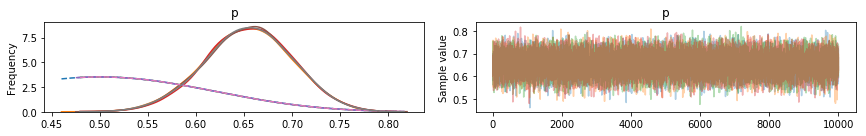

In [15]:
# Generate a trace plot, use the first 1000 samples as burn-in
pm.traceplot(trace[1000:], priors = [pm.Beta.dist(alpha=10, beta=10)])

### Text Summary

pymc3 also allows us to summarize the trace in a table, which is conveniently formatted as an HTML table for us in Jupyter! Let's compare the mean and standard deviation of our approximated posterior to those of the analytically computed one. 

In [14]:
pm.summary(trace).round(4)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.6547,0.045,0.0004,0.5679,0.7438,15931.2491,1.0001


# Bayesian Hypothesis Testing

 ### A Bayesian t-test 
 
 
Bayesian inference is a powerful framework for predictive modeling, because it offers a greater degree of control as compared to frequentist inference. A Bayesian approach can also be extended to hypothesis testing. 

A detailed explanation is beyond the scope of this lecture, but I want to direct the listener toward a discussion of Bayesian t-testing and its implementation in the R package **Bayesian First Aid** as an introduction to testing in the Bayesian framework. 


http://www.sumsar.net/blog/2014/02/bayesian-first-aid-one-sample-t-test/

https://github.com/rasmusab/bayesian_first_aid